<a href="https://colab.research.google.com/github/HARASEON/ML_class/blob/main/Copy_of_EM_FOR_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EM for GMM

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
import warnings
import sys
import pandas as pd
import numpy as np
from scipy import stats
from scipy.special import logsumexp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from plotnine import *
%matplotlib inline

# Please input your txt file path in right below.
data_unlabeled = pd.read_table('/content/drive/My Drive/exam_for_ML/GMM-data.txt', sep=' ', header = None)
data_unlabeled.columns = ["x1","x2"] # label names are x1 and x2.
features = ["x1","x2"]
X = data_unlabeled[features]
z = StandardScaler()
X[features] = z.fit_transform(X)

data_unlabeled

,x1,x2
0,6.70,17.69
1,6.92,19.24
2,7.24,23.86
3,12.69,18.49
4,5.16,17.91
...,...,...
295,13.08,22.69
296,6.49,20.87
297,12.70,12.18
298,9.17,14.43


In [ ]:
# testing
EM = GaussianMixture(n_components=3)
EM.fit(X)
cluster = EM.predict(X)
cluster

array([2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 0, 1, 2, 1,
       2, 1, 2, 2, 1, 0, 0, 0, 2, 2, 2, 0, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0,
       2, 1, 1, 1, 2, 0, 2, 2, 1, 2, 0, 0, 2, 2, 1, 2, 1, 0, 0, 2, 0, 2,
       1, 1, 1, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 0, 2, 1,
       2, 2, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 2, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 2, 2, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 1, 0, 2, 2,
       1, 2, 2, 1, 0, 2, 0, 2, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1,
       2, 0, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 2, 0, 1, 2, 2,
       2, 2, 2, 0, 1, 2, 2, 0, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2,
       1, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1, 0, 2, 1, 1, 2, 0, 0, 2, 1, 2, 2,
       1, 1, 1, 0, 0, 0, 0, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 0,
       2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 0, 2, 1, 0, 2, 2, 2,
       2, 0, 0, 1, 2, 2, 1, 0, 2, 2, 0, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0,
       1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 1])

In [ ]:
cluster_p = EM.predict_proba(X)
np.shape(cluster_p)

(300, 3)

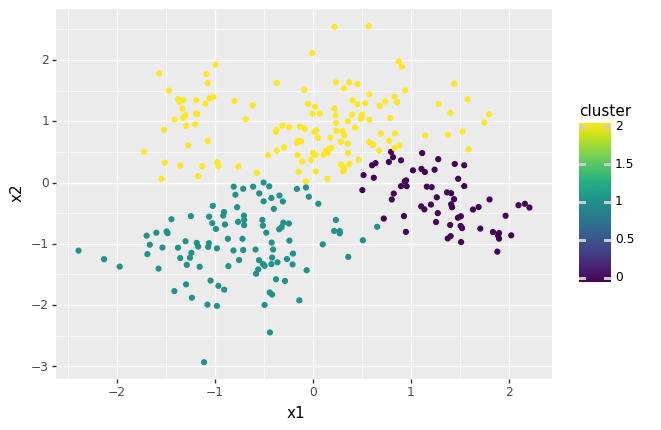

<ggplot: (8789527251025)>

In [ ]:
X['cluster'] = cluster
ggplot(X, aes(x="x1",y ="x2", color = 'cluster')) + geom_point()

# Coding without Open library

<Figure size 1080x864 with 0 Axes>

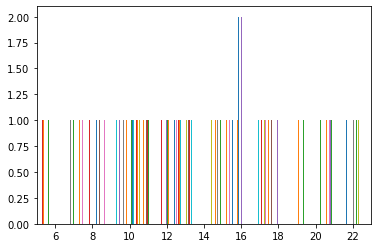

<Figure size 1080x864 with 0 Axes>

In [ ]:
# Data exploring
plt.hist(data_unlabeled, histtype = 'bar')
plt.xlim(5, 23)
plt.figure(figsize =(15,12))

In [ ]:
## GMM(Gausian Mixture Model)
# Step 1 initializing all the unknown parameters.

def get_random_psd(n):
    '''
    Initializing parameters which is positive semi-definite.
    '''
    x = np.random.normal(0, 1, size=(n, n))
    return np.dot(x, x.transpose())


def initialize_random_params():
    params = {'phi': np.random.uniform(0, 1),
              'mu0': np.random.normal(0, 1, size=(2,)),
              'mu1': np.random.normal(0, 1, size=(2,)),
              'sigma0': get_random_psd(2),
              'sigma1': get_random_psd(2)}
    return params

In [ ]:
def e_step(x, params):
    '''
    Expectation Step
    Calculate 
    - the heuristic of the Q(y = x1|x) and Q(y= x2|x) for every data point
    - average log-likelihoods that will be maximized in the M step
    '''
    np.log([stats.multivariate_normal(params["mu0"], params["sigma0"], allow_singular=True).pdf(x),
            stats.multivariate_normal(params["mu1"], params["sigma1"], allow_singular=True).pdf(x)])
    log_p_y_x = np.log([1-params["phi"], params["phi"]])[np.newaxis, ...] + \
                np.log([stats.multivariate_normal(params["mu0"], params["sigma0"], allow_singular=True).pdf(x),
            stats.multivariate_normal(params["mu1"], params["sigma1"], allow_singular=True).pdf(x)]).T
    log_p_y_x_norm = logsumexp(log_p_y_x, axis=1)
    return log_p_y_x_norm, np.exp(log_p_y_x - log_p_y_x_norm[..., np.newaxis])

In [ ]:
def m_step(x, params):
    '''
    Maximization Step
    Caution! It can be local maximum
    '''
    total_count = x.shape[0]
    _, heuristics = e_step(x, params)
    heuristic0 = heuristics[:, 0]
    heuristic1 = heuristics[:, 1]
    sum_heuristic1 = np.sum(heuristic1)
    sum_heuristic0 = np.sum(heuristic0)
    phi = (sum_heuristic1/total_count)
    mu0 = (heuristic0[..., np.newaxis].T.dot(x)/sum_heuristic0).flatten()
    mu1 = (heuristic1[..., np.newaxis].T.dot(x)/sum_heuristic1).flatten()
    diff0 = x - mu0
    sigma0 = diff0.T.dot(diff0 * heuristic0[..., np.newaxis]) / sum_heuristic0
    diff1 = x - mu1
    sigma1 = diff1.T.dot(diff1 * heuristic1[..., np.newaxis]) / sum_heuristic1
    params = {'phi': phi, 'mu0': mu0, 'mu1': mu1, 'sigma0': sigma0, 'sigma1': sigma1}
    return params

In [ ]:
# Running EM algorithm until the average log-likelihood converges.
def get_avg_log_likelihood(x, params):
    loglikelihood, _ = e_step(x, params)
    return np.mean(loglikelihood)


def run_em(x, params):
    avg_loglikelihoods = []
    while True:
        avg_loglikelihood = get_avg_log_likelihood(x, params)
        avg_loglikelihoods.append(avg_loglikelihood)
        if len(avg_loglikelihoods) > 2 and abs(avg_loglikelihoods[-1] - avg_loglikelihoods[-2]) < 0.0001:
            break
        params = m_step(data_unlabeled, params)
    print("\tphi: %s\n\tmu_0: %s\n\tmu_1: %s\n\tsigma_0: %s\n\tsigma_1: %s"
               % (params['phi'], params['mu0'], params['mu1'], params['sigma0'], params['sigma1']))
    _, posterior = e_step(data_unlabeled, params)
    forecasts = np.argmax(posterior, axis=1)
    return forecasts, posterior, avg_loglikelihoods


{'phi': 0.7108976008128951, 'mu0': array([0.63672994, 0.02849103]), 'mu1': array([-0.1518841 , -1.03488995]), 'sigma0': array([[ 9.69957492, -3.12487808],
       [-3.12487808,  2.96850993]]), 'sigma1': array([[0.35520224, 0.04142099],
       [0.04142099, 6.99548022]])}
	phi: 0.06163404437156494
	mu_0: [11.56416674 16.38722006]
	mu_1: [ 6.24729878 21.43497055]
	sigma_0:            x1         x2
x1  15.549520   4.418119
x2   4.418119  13.143544
	sigma_1:           x1        x2
x1  0.368299  0.328789
x2  0.328789  1.089985
total steps:  24


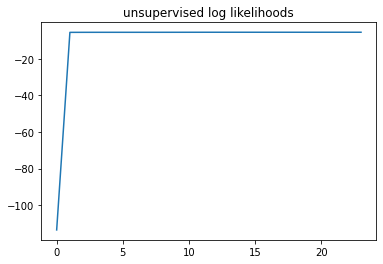

In [ ]:
random_params = initialize_random_params()
print(random_params)
unsupervised_forecastsforecasts, unsupervised_posterior, unsupervised_loglikelihoods = run_em(data_unlabeled, random_params)
print("total steps: ", len(unsupervised_loglikelihoods))

plt.plot(unsupervised_loglikelihoods)
plt.title("unsupervised log likelihoods")
plt.savefig("unsupervised.png")
plt.show()

In [ ]:
fig = plt.figure(figsize = (12, 8))


In [ ]:
np.shape(data_unlabeled)
np.shape(cluster)

(300, 2)

# EM algorithm

ValueError: ignored

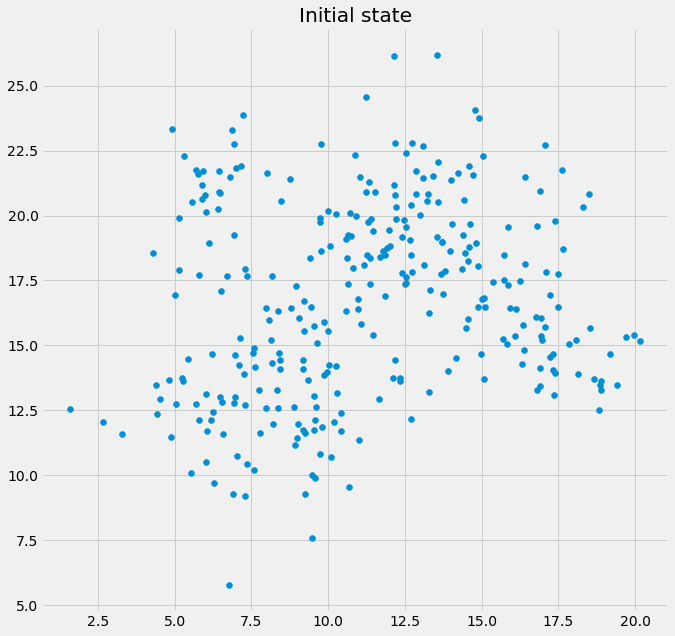

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np
from scipy.stats import norm

X=data_unlabeled # (300,2)
Y=cluster # (300,)

# 2D case

class EM:

    def __init__(self, X, number_of_sources, iterations):
        self.iterations = iterations
        self.number_of_sources = number_of_sources
        self.X = X
        self.mu = None
        self.pi = None
        self.cov = None
        self.XY = None  

    def run(self):
        """
        Function for interation        
        """
        test = self.X.iloc[:,0]
        test2 = self.X.iloc[:,1]
        self.reg_cov = 1e-6*np.identity(len(self.X.iloc[:,0]))
        x, y = np.meshgrid(np.sort(test), np.sort(test2))
        # x, y = np.meshgrid(np.sort(self.X[:,0]),np.sort(self.X[:,1]))
        self.XY = np.array([x.flatten(),y.flatten()]).T

        """
        Setting initial parameters : mu, cov, pi
        """
        #self.mu = np.random.randint(min(self.X[:,0]), max(self.X[:0]), size = (self.number_of_sources,len(self.X[0])))
        self.mu = np.random.randint(min(test), max(test), size = (self.number_of_sources,len(test)))
        # Since we assume K sources (K Gaussians) where each has N dimensions, This is N * M matrix (= 300 *2)
        #self.cov = np.zeros((self.number_of_sources, len(X[0]), len(X[0])))
        self.cov = np.zeros((self.number_of_sources, len(test), len(test)))
        # I need to N*M*M covariance matrix for each source since we have M features(2 features)
        # I create symmetric covariance matrices with ones on the digonal
        for dim in range(len(self.cov)):
          np.fill_diagonal(self.cov[dim], 5)

        self.pi = np.ones(self.number_of_sources)/self.number_of_sources
        # Are Average prabability of i th data belong to j cluster
        log_likelihoods = []
        # In this list, I will store the log likelihoods per iteration and plot them in the end to check it out 
        # if It has converged

        """
        Plot the initial state
        """    
        fig = plt.figure(figsize=(10,10))
        ax0 = fig.add_subplot(111)
        ax0.scatter(test,test2)
        ax0.set_title('Initial state')
        for m,c in zip(self.mu,self.cov):
            c += self.reg_cov
            multi_normal = multivariate_normal(mean=m,cov=c)
            # ax0.contour(np.sort(test),np.sort(test2),multi_normal.pdf(self.XY).reshape(len(self.X),len(self.X)),colors='black',alpha=0.3)
            # ax0.scatter(m[0],m[1],c='grey',zorder=10,s=100)
        
        """
        E-Step
        """
        for i in range(self.iterations):               
          
            r_ic = np.zeros((len(self.X),len(self.cov)))

            for m,co,p,r in zip(self.mu,self.cov,self.pi,range(len(r_ic[0]))):
                co+=self.reg_cov
                mn = multivariate_normal(mean=m,cov=co)
                r_ic[:,r] = p*mn.pdf(self.X)/np.sum([pi_c*multivariate_normal(mean=mu_c,cov=cov_c).pdf(X) for pi_c,mu_c,cov_c in zip(self.pi,self.mu,self.cov+self.reg_cov)], axis=0)
      
        """
        M-Step
        """

            # Calculate the new mean vector and new covariance matrices, 
            # based on the probable membership of the single x_i to classes c -> r_ic
        self.mu = []
        self.cov = []
        self.pi = []
        log_likelihood = []

        for c in range(len(r_ic[0])):
            m_c = np.sum(r_ic[:,c],axis=0)
            mu_c = (1/m_c)*np.sum(self.X*r_ic[:,c].reshape(len(self.X),1),axis=0)
            self.mu.append(mu_c)

            # Calculate the covariance matrix per source based on the new mean
            self.cov.append(((1/m_c)*np.dot((np.array(r_ic[:,c]).reshape(len(self.X),1)*(self.X-mu_c)).T,(self.X-mu_c))) + self.reg_cov)
            # self.cov.append(((1/m_c)*np.dot((np.array(r_ic[:,c]).reshape(len(self.X),1)*(self.X-mu_c)).T,(self.X-mu_c)))+self.reg_cov)
            # Calculate pi_new which is the "fraction of points" respectively the fraction of the probability assigned to each source 
            self.pi.append(m_c/np.sum(r_ic)) # Here np.sum(r_ic) gives as result the number of instances. This is logical since we know 
                                            # that the columns of each row of r_ic adds up to 1. Since we add up all elements, we sum up all
                                            # columns per row which gives 1 and then all rows which gives then the number of instances (rows) 
                                            # in X --> Since pi_new contains the fractions of datapoints, assigned to the sources c,
                                            # The elements in pi_new must add up to 1

            
            
            """Log likelihood"""
            log_likelihoods.append(np.log(np.sum([k*multivariate_normal(self.mu[i],self.cov[j]).pdf(X) for k,i,j in zip(self.pi,range(len(self.mu)),range(len(self.cov)))])))

            """
            This process of E step followed by a M step is now iterated a number of n times. 
            In the second step for instance, we use the calculated pi_new, mu_new and cov_new to calculate the new r_ic which are then used in the second M step
            to calculate the mu_new2 and cov_new2 and so on....
            """

        fig2 = plt.figure(figsize=(10,10))
        ax1 = fig2.add_subplot(111) 
        ax1.set_title('Log-Likelihood')
        ax1.plot(range(0,self.iterations,1),log_likelihoods)
        #plt.show()
    
    """Predict the membership of an unseen, new datapoint"""
    def predict(self,Y):
        # PLot the point onto the fittet gaussians
        fig3 = plt.figure(figsize=(10,10))
        ax2 = fig3.add_subplot(111)
        ax2.scatter(self.X[:,0],self.X[:,1])
        for m,c in zip(self.mu,self.cov):
            multi_normal = multivariate_normal(mean=m,cov=c)
            ax2.contour(np.sort(self.X[:,0]),np.sort(self.X[:,1]),multi_normal.pdf(self.XY).reshape(len(self.X).T,len(self.X)),colors='black',alpha=0.3)
            ax2.scatter(m[0],m[1],c='grey',zorder=10,s=100)
            ax2.set_title('Final state')
            for y in Y:
                ax2.scatter(y[0],y[1],c='orange',zorder=10,s=100)
        prediction = []        
        for m,c in zip(self.mu,self.cov):  
            #print(c)
            prediction.append(multivariate_normal(mean=m,cov=c).pdf(Y)/np.sum([multivariate_normal(mean=mean,cov=cov).pdf(Y) for mean,cov in zip(self.mu,self.cov)]))
        #plt.show()
        return prediction
         
    
    
EM = EM(X,3,50)     
EM.run()
EM.predict([[0.5,0.5]]) # General prediction of pi
     

In [ ]:
# 0. Create dataset
X,Y = make_blobs(cluster_std=1.5,random_state=20,n_samples=300,centers=3)

# Stratch dataset to get ellipsoid data
X = np.dot(X,np.random.RandomState(0).randn(2,2))
print(np.shape(X))
print(np.shape(Y))

(300, 2)
(300,)


In [ ]:
X = data_unlabeled
np.shape(X)

(300, 2)

[3.949895488651047e-48, 0.999911117912295, 8.88820877049442e-05]

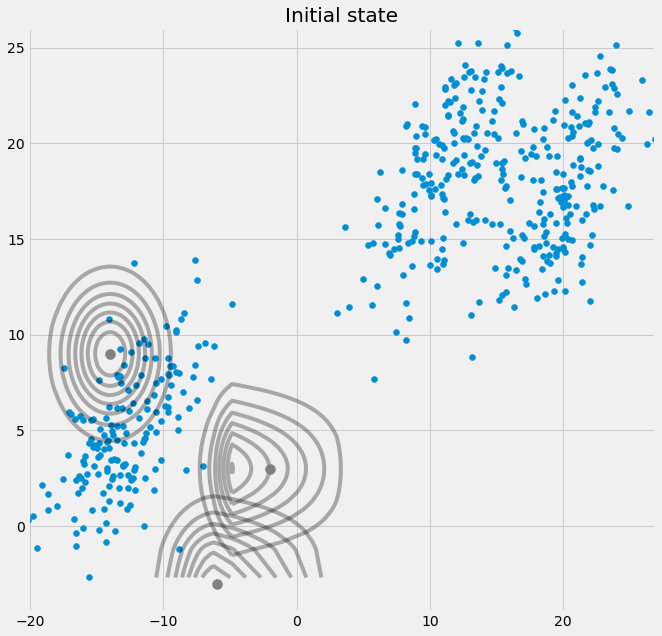

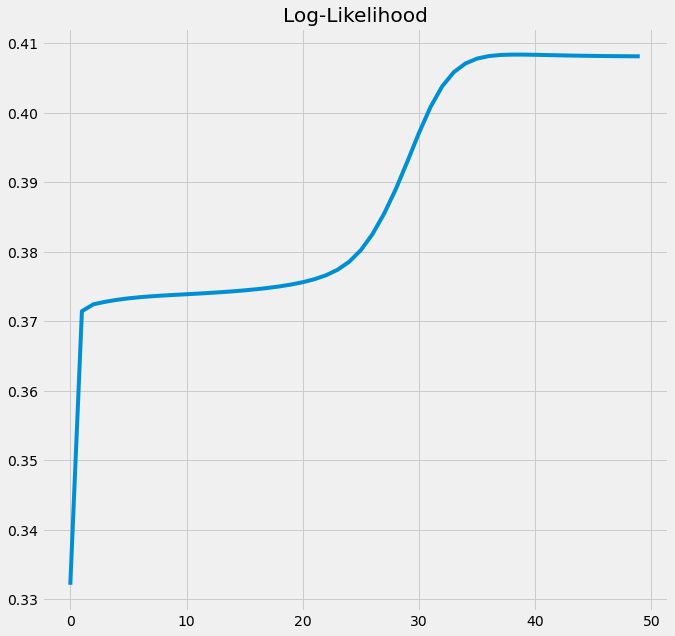

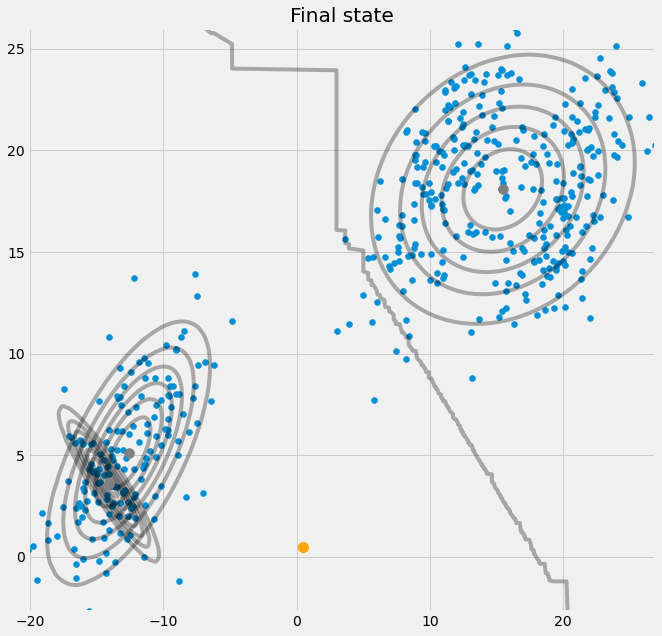

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
from scipy.stats import multivariate_normal


# 0. Create dataset
X,Y = make_blobs(cluster_std=1.5,random_state=20,n_samples=500,centers=3)
np.shape(X)
np.shape(Y)
# Stratch dataset to get ellipsoid data
X = np.dot(X,np.random.RandomState(0).randn(2,2))


class GMM:

    def __init__(self,X,number_of_sources,iterations):
        self.iterations = iterations
        self.number_of_sources = number_of_sources
        self.X = X
        self.mu = None
        self.pi = None
        self.cov = None
        self.XY = None
        
    

    """Define a function which runs for iterations, iterations"""
    def run(self):
        self.reg_cov = 1e-6*np.identity(len(self.X[0]))
        x,y = np.meshgrid(np.sort(self.X[:,0]),np.sort(self.X[:,1]))
        self.XY = np.array([x.flatten(),y.flatten()]).T
           
                    
        """ 1. Set the initial mu, covariance and pi values"""
        self.mu = np.random.randint(min(self.X[:,0]),max(self.X[:,0]),size=(self.number_of_sources,len(self.X[0]))) # This is a nxm matrix since we assume n sources (n Gaussians) where each has m dimensions
        self.cov = np.zeros((self.number_of_sources,len(X[0]),len(X[0]))) # We need a nxmxm covariance matrix for each source since we have m features --> We create symmetric covariance matrices with ones on the digonal
        for dim in range(len(self.cov)):
            np.fill_diagonal(self.cov[dim],5)


        self.pi = np.ones(self.number_of_sources)/self.number_of_sources # Are "Fractions"
        log_likelihoods = [] # In this list we store the log likehoods per iteration and plot them in the end to check if
                             # if we have converged
            
        """Plot the initial state"""    
        fig = plt.figure(figsize=(10,10))
        ax0 = fig.add_subplot(111)
        ax0.scatter(self.X[:,0],self.X[:,1])
        ax0.set_title('Initial state')
        for m,c in zip(self.mu,self.cov):
            c += self.reg_cov
            multi_normal = multivariate_normal(mean=m,cov=c)
            ax0.contour(np.sort(self.X[:,0]),np.sort(self.X[:,1]),multi_normal.pdf(self.XY).reshape(len(self.X),len(self.X)),colors='black',alpha=0.3)
            ax0.scatter(m[0],m[1],c='grey',zorder=10,s=100)
        
        for i in range(self.iterations):               

            """E Step"""
            r_ic = np.zeros((len(self.X),len(self.cov)))

            for m,co,p,r in zip(self.mu,self.cov,self.pi,range(len(r_ic[0]))):
                co+=self.reg_cov
                mn = multivariate_normal(mean=m,cov=co)
                r_ic[:,r] = p*mn.pdf(self.X)/np.sum([pi_c*multivariate_normal(mean=mu_c,cov=cov_c).pdf(X) for pi_c,mu_c,cov_c in zip(self.pi,self.mu,self.cov+self.reg_cov)],axis=0)

            """
            The above calculation of r_ic is not that obvious why I want to quickly derive what we have done above.
            First of all the nominator:
            We calculate for each source c which is defined by m,co and p for every instance x_i, the multivariate_normal.pdf() value.
            For each loop this gives us a 100x1 matrix (This value divided by the denominator is then assigned to r_ic[:,r] which is in 
            the end a 100x3 matrix).
            Second the denominator:
            What we do here is, we calculate the multivariate_normal.pdf() for every instance x_i for every source c which is defined by
            pi_c, mu_c, and cov_c and write this into a list. This gives us a 3x100 matrix where we have 100 entrances per source c.
            Now the formula wants us to add up the pdf() values given by the 3 sources for each x_i. Hence we sum up this list over axis=0.
            This gives us then a list with 100 entries.
            What we have now is FOR EACH LOOP a list with 100 entries in the nominator and a list with 100 entries in the denominator
            where each element is the pdf per class c for each instance x_i (nominator) respectively the summed pdf's of classes c for each 
            instance x_i. Consequently we can now divide the nominator by the denominator and have as result a list with 100 elements which we
            can then assign to r_ic[:,r] --> One row r per source c. In the end after we have done this for all three sources (three loops)
            and run from r==0 to r==2 we get a matrix with dimensionallity 100x3 which is exactly what we want.
            If we check the entries of r_ic we see that there mostly one element which is much larger than the other two. This is because
            every instance x_i is much closer to one of the three gaussians (that is, much more likely to come from this gaussian) than
            it is to the other two. That is practically speaing, r_ic gives us the fraction of the probability that x_i belongs to class
            c over the probability that x_i belonges to any of the classes c (Probability that x_i occurs given the 3 Gaussians).
            """

            """M Step"""

            # Calculate the new mean vector and new covariance matrices, based on the probable membership of the single x_i to classes c --> r_ic
            self.mu = []
            self.cov = []
            self.pi = []
            log_likelihood = []

            for c in range(len(r_ic[0])):
                m_c = np.sum(r_ic[:,c],axis=0)
                mu_c = (1/m_c)*np.sum(self.X*r_ic[:,c].reshape(len(self.X),1),axis=0)
                self.mu.append(mu_c)

                # Calculate the covariance matrix per source based on the new mean
                self.cov.append(((1/m_c)*np.dot((np.array(r_ic[:,c]).reshape(len(self.X),1)*(self.X-mu_c)).T,(self.X-mu_c)))+self.reg_cov)
                # Calculate pi_new which is the "fraction of points" respectively the fraction of the probability assigned to each source 
                self.pi.append(m_c/np.sum(r_ic)) # Here np.sum(r_ic) gives as result the number of instances. This is logical since we know 
                                                # that the columns of each row of r_ic adds up to 1. Since we add up all elements, we sum up all
                                                # columns per row which gives 1 and then all rows which gives then the number of instances (rows) 
                                                # in X --> Since pi_new contains the fractions of datapoints, assigned to the sources c,
                                                # The elements in pi_new must add up to 1

            
            
            """Log likelihood"""
            log_likelihoods.append(np.log(np.sum([k*multivariate_normal(self.mu[i],self.cov[j]).pdf(X) for k,i,j in zip(self.pi,range(len(self.mu)),range(len(self.cov)))])))

            

            """
            This process of E step followed by a M step is now iterated a number of n times. In the second step for instance,
            we use the calculated pi_new, mu_new and cov_new to calculate the new r_ic which are then used in the second M step
            to calculat the mu_new2 and cov_new2 and so on....
            """

        fig2 = plt.figure(figsize=(10,10))
        ax1 = fig2.add_subplot(111) 
        ax1.set_title('Log-Likelihood')
        ax1.plot(range(0,self.iterations,1),log_likelihoods)
        #plt.show()
    
    """Predict the membership of an unseen, new datapoint"""
    def predict(self,Y):
        # PLot the point onto the fittet gaussians
        fig3 = plt.figure(figsize=(10,10))
        ax2 = fig3.add_subplot(111)
        ax2.scatter(self.X[:,0],self.X[:,1])
        for m,c in zip(self.mu,self.cov):
            multi_normal = multivariate_normal(mean=m,cov=c)
            ax2.contour(np.sort(self.X[:,0]),np.sort(self.X[:,1]),multi_normal.pdf(self.XY).reshape(len(self.X),len(self.X)),colors='black',alpha=0.3)
            ax2.scatter(m[0],m[1],c='grey',zorder=10,s=100)
            ax2.set_title('Final state')
            for y in Y:
                ax2.scatter(y[0],y[1],c='orange',zorder=10,s=100)
        prediction = []        
        for m,c in zip(self.mu,self.cov):  
            #print(c)
            prediction.append(multivariate_normal(mean=m,cov=c).pdf(Y)/np.sum([multivariate_normal(mean=mean,cov=cov).pdf(Y) for mean,cov in zip(self.mu,self.cov)]))
        #plt.show()
        return prediction
         
    
    
GMM = GMM(X,3,50)     
GMM.run()
GMM.predict([[0.5,0.5]])
